<a href="https://colab.research.google.com/github/yenlung/AI-Demo/blob/master/%E7%94%A8AI%E5%8D%94%E4%BD%9C%E7%9A%84Python%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 鳶尾花分類

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
# 定義特徵名稱的中文對應
feature_names_chinese = ['花萼長度', '花萼寬度', '花瓣長度', '花瓣寬度']

# 將資料轉換成 Pandas DataFrame，並使用中文特徵名稱
df = pd.DataFrame(data=iris.data, columns=feature_names_chinese)

In [ ]:
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['標籤'] = iris.target

In [ ]:
df

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,標籤
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df['花種名稱'] = df['標籤'].apply(lambda x: iris.target_names[x])

In [ ]:
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,標籤,花種名稱
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# 設定 X 每一列為 df 中一筆數據的 "花萼長度" 及 "花萼寬度"

X = df.loc[:, ['花萼長度', '花萼寬度']].values

In [ ]:
X.shape

(150, 2)

In [ ]:
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,標籤,花種名稱
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# Y 設成一個 numpy array, 為 df 每筆數據的 "標籤" 值

Y = df['標籤'].values

In [ ]:
# 切 X, Y 中的 20% 為測試資料, 放入 x_test, y_test; 其餘訓練資料放 x_train, y_train

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=9487)


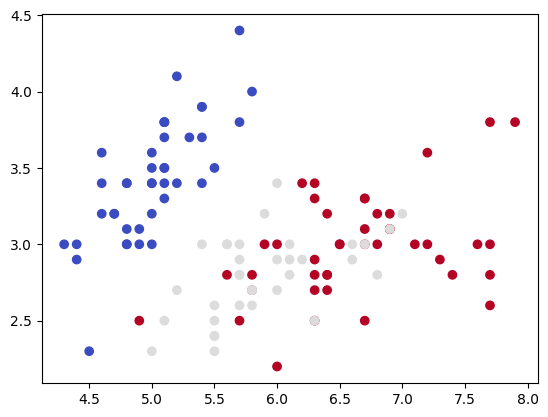

In [ ]:
# 畫出訓練資料, 用不同顏色, 標記每筆數據是哪一類

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='coolwarm')

In [ ]:
# step 1: 打造 SVM 分類機

from sklearn.svm import SVC

clf = SVC(kernel='linear')

In [ ]:
# step 2: 訓練

clf.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
# step 3: 預測

y_pred = clf.predict(x_test)

In [ ]:
# 評估測試資料的正確率

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7

In [ ]:
# 訓練資料的正確率

y_pred_train = clf.predict(x_train)

accuracy_score(y_train, y_pred_train)

0.8666666666666667

In [ ]:
y_pred - y_test

array([ 0,  1,  0,  1, -1,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  1,  0, -1])

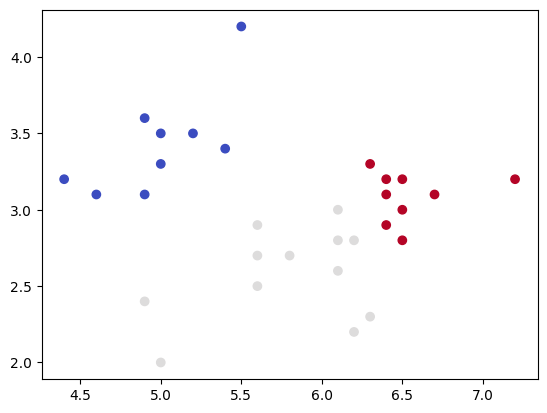

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap='coolwarm')

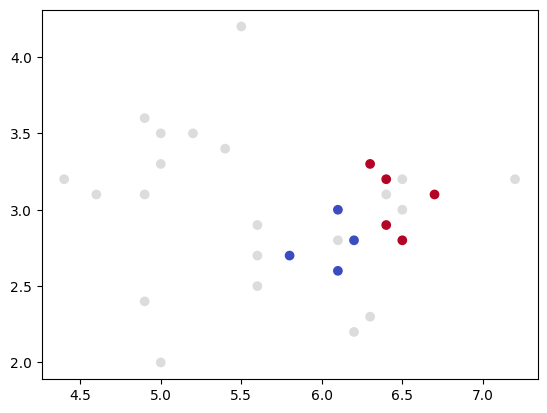

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred-y_test, cmap='coolwarm')

### 2. 非監督式學習

Text(0, 0.5, 'Feature 2')

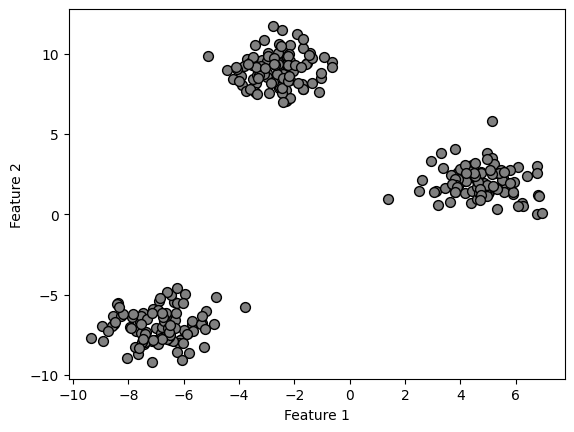

In [ ]:
from sklearn.datasets import make_blobs

# 產生數據
x, y = make_blobs(n_samples=300, centers=3, cluster_std=1, random_state=42)

# 繪製生成的數據
plt.scatter(x[:, 0], x[:, 1], c='gray', edgecolor='k', s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [ ]:
# 用 KMeans 把 x 的數據分為三群

from sklearn.cluster import KMeans

In [ ]:
# step 1: 打造 KMeans 函數學習機, 指定 random seed, 分 5 群

kmeans = KMeans(n_clusters=5, random_state=0)

In [ ]:
# step 2: 訓練 (分群)

kmeans.fit(x)

KMeans(n_clusters=5, random_state=0)

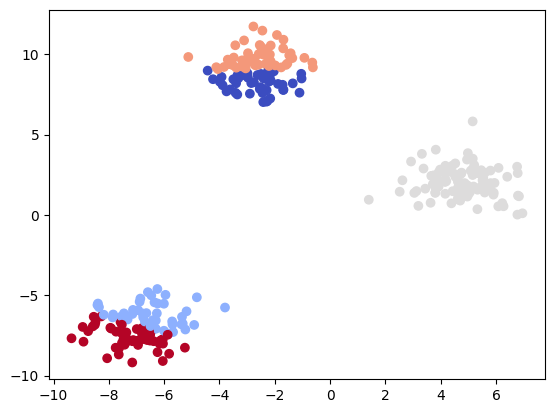

In [ ]:
# step 3: 預測: 畫出分群結果

plt.scatter(x[:, 0], x[:, 1], c=kmeans.labels_, cmap='coolwarm')

#### 用 DBSCAN 來分群

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# step 1: 打造一個 DBSCAN 分群機



dbscan = DBSCAN(eps=0.5, min_samples=3)

In [ ]:
# step 2: 訓練 dbscan

dbscan.fit(x)

DBSCAN(min_samples=3)

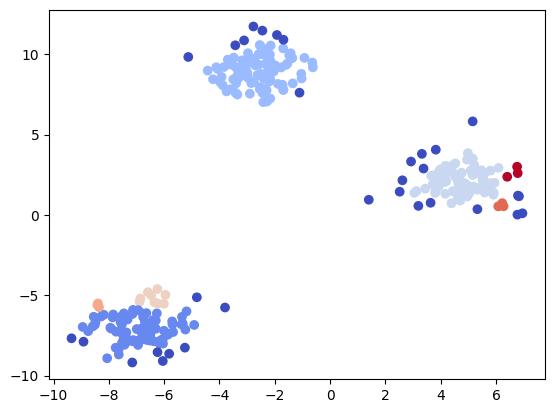

In [ ]:
# step 3: 預測 (畫出圖來)

plt.scatter(x[:, 0], x[:, 1], c=dbscan.labels_, cmap='coolwarm')